In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

trainingData = pd.read_csv(r"./training-core.csv") 
validationData = pd.read_csv(r"./validation-core.csv") 

# ref: https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
# ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
le = LabelEncoder()

trainingData['class']= le.fit_transform(trainingData['class'])

validationData['class']= le.fit_transform(validationData['class']) 

# ref: https://stackoverflow.com/questions/26786960/remove-index-column-while-saving-csv-in-pandas
trainingData.to_csv('./training.csv', mode = 'w', index=False)
validationData.to_csv('./validation.csv', mode = 'w', index=False)

#Red data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("./training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("./validation.csv", delimiter=",", skip_header=True)

# split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:4]
Y1 = TrainingSet[:,4]

X2 = ValidationSet[:,0:4]
Y2 = ValidationSet[:,4]

# create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=4))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200), metrics=['accuracy'])

# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Using TensorFlow backend.


Train on 120 samples, validate on 30 samples
Epoch 1/10000000
 - 0s - loss: 1.9532 - acc: 0.3417 - val_loss: 1.4930 - val_acc: 0.3000
Epoch 2/10000000
 - 0s - loss: 1.4341 - acc: 0.3417 - val_loss: 1.0681 - val_acc: 0.3000
Epoch 3/10000000
 - 0s - loss: 1.0189 - acc: 0.3417 - val_loss: 0.6280 - val_acc: 0.6667
Epoch 4/10000000
 - 0s - loss: 0.6030 - acc: 0.6667 - val_loss: 0.3145 - val_acc: 0.6667
Epoch 5/10000000
 - 0s - loss: 0.3219 - acc: 0.6333 - val_loss: 0.2274 - val_acc: 0.5667
Epoch 6/10000000
 - 0s - loss: 0.2353 - acc: 0.4333 - val_loss: 0.2082 - val_acc: 0.6000
Epoch 7/10000000
 - 0s - loss: 0.2223 - acc: 0.5500 - val_loss: 0.1988 - val_acc: 0.5667
Epoch 8/10000000
 - 0s - loss: 0.2078 - acc: 0.5750 - val_loss: 0.1676 - val_acc: 0.7667
Epoch 9/10000000
 - 0s - loss: 0.1749 - acc: 0.7500 - val_loss: 0.1359 - val_acc: 0.9333
Epoch 10/10000000
 - 0s - loss: 0.1450 - acc: 0.8833 - val_loss: 0.1127 - val_acc: 0.9333
Epoch 11/10000000
 - 0s - loss: 0.1229 - acc: 0.8667 - val_loss:

Epoch 92/10000000
 - 0s - loss: 0.0441 - acc: 0.9833 - val_loss: 0.0287 - val_acc: 1.0000
Epoch 93/10000000
 - 0s - loss: 0.0442 - acc: 0.9833 - val_loss: 0.0323 - val_acc: 1.0000
Epoch 94/10000000
 - 0s - loss: 0.0437 - acc: 0.9750 - val_loss: 0.0396 - val_acc: 1.0000
Epoch 95/10000000
 - 0s - loss: 0.0453 - acc: 0.9667 - val_loss: 0.0338 - val_acc: 1.0000
Epoch 96/10000000
 - 0s - loss: 0.0433 - acc: 0.9667 - val_loss: 0.0268 - val_acc: 1.0000
Epoch 97/10000000
 - 0s - loss: 0.0459 - acc: 0.9667 - val_loss: 0.0266 - val_acc: 1.0000
Epoch 98/10000000
 - 0s - loss: 0.0451 - acc: 0.9667 - val_loss: 0.0345 - val_acc: 1.0000
Epoch 99/10000000
 - 0s - loss: 0.0442 - acc: 0.9667 - val_loss: 0.0487 - val_acc: 1.0000
Epoch 100/10000000
 - 0s - loss: 0.0489 - acc: 0.9583 - val_loss: 0.0445 - val_acc: 1.0000
Epoch 101/10000000
 - 0s - loss: 0.0464 - acc: 0.9667 - val_loss: 0.0338 - val_acc: 1.0000
Epoch 102/10000000
 - 0s - loss: 0.0426 - acc: 0.9667 - val_loss: 0.0273 - val_acc: 1.0000
Epoch 1

 - 0s - loss: 0.0381 - acc: 0.9833 - val_loss: 0.0220 - val_acc: 1.0000
Epoch 183/10000000
 - 0s - loss: 0.0436 - acc: 0.9667 - val_loss: 0.0242 - val_acc: 1.0000
Epoch 184/10000000
 - 0s - loss: 0.0508 - acc: 0.9500 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 185/10000000
 - 0s - loss: 0.0430 - acc: 0.9583 - val_loss: 0.0288 - val_acc: 1.0000
Epoch 186/10000000
 - 0s - loss: 0.0401 - acc: 0.9833 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 187/10000000
 - 0s - loss: 0.0411 - acc: 0.9833 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 188/10000000
 - 0s - loss: 0.0393 - acc: 0.9750 - val_loss: 0.0229 - val_acc: 1.0000
Epoch 189/10000000
 - 0s - loss: 0.0404 - acc: 0.9750 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 190/10000000
 - 0s - loss: 0.0406 - acc: 0.9750 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 191/10000000
 - 0s - loss: 0.0390 - acc: 0.9833 - val_loss: 0.0287 - val_acc: 1.0000
Epoch 192/10000000
 - 0s - loss: 0.0390 - acc: 0.9833 - val_loss: 0.0289 - val_acc: 1.0000
Epoch 193/10000000

Epoch 273/10000000
 - 0s - loss: 0.0376 - acc: 0.9833 - val_loss: 0.0243 - val_acc: 1.0000
Epoch 274/10000000
 - 0s - loss: 0.0363 - acc: 0.9750 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 275/10000000
 - 0s - loss: 0.0384 - acc: 0.9833 - val_loss: 0.0203 - val_acc: 1.0000
Epoch 276/10000000
 - 0s - loss: 0.0417 - acc: 0.9750 - val_loss: 0.0207 - val_acc: 1.0000
Epoch 277/10000000
 - 0s - loss: 0.0381 - acc: 0.9750 - val_loss: 0.0256 - val_acc: 1.0000
Epoch 278/10000000
 - 0s - loss: 0.0368 - acc: 0.9750 - val_loss: 0.0296 - val_acc: 1.0000
Epoch 279/10000000
 - 0s - loss: 0.0381 - acc: 0.9750 - val_loss: 0.0269 - val_acc: 1.0000
Epoch 280/10000000
 - 0s - loss: 0.0375 - acc: 0.9750 - val_loss: 0.0239 - val_acc: 1.0000
Epoch 281/10000000
 - 0s - loss: 0.0367 - acc: 0.9750 - val_loss: 0.0230 - val_acc: 1.0000
Epoch 282/10000000
 - 0s - loss: 0.0365 - acc: 0.9750 - val_loss: 0.0212 - val_acc: 1.0000
Epoch 283/10000000
 - 0s - loss: 0.0373 - acc: 0.9750 - val_loss: 0.0226 - val_acc: 1.0000

Epoch 364/10000000
 - 0s - loss: 0.0404 - acc: 0.9667 - val_loss: 0.0222 - val_acc: 1.0000
Epoch 365/10000000
 - 0s - loss: 0.0348 - acc: 0.9750 - val_loss: 0.0432 - val_acc: 1.0000
Epoch 366/10000000
 - 0s - loss: 0.0460 - acc: 0.9583 - val_loss: 0.0320 - val_acc: 1.0000
Epoch 367/10000000
 - 0s - loss: 0.0370 - acc: 0.9667 - val_loss: 0.0201 - val_acc: 1.0000
Epoch 368/10000000
 - 0s - loss: 0.0460 - acc: 0.9500 - val_loss: 0.0200 - val_acc: 1.0000
Epoch 369/10000000
 - 0s - loss: 0.0426 - acc: 0.9583 - val_loss: 0.0313 - val_acc: 1.0000
Epoch 370/10000000
 - 0s - loss: 0.0403 - acc: 0.9583 - val_loss: 0.0429 - val_acc: 1.0000
Epoch 371/10000000
 - 0s - loss: 0.0438 - acc: 0.9583 - val_loss: 0.0229 - val_acc: 1.0000
Epoch 372/10000000
 - 0s - loss: 0.0347 - acc: 0.9750 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 373/10000000
 - 0s - loss: 0.0415 - acc: 0.9750 - val_loss: 0.0196 - val_acc: 1.0000
Epoch 374/10000000
 - 0s - loss: 0.0384 - acc: 0.9750 - val_loss: 0.0288 - val_acc: 1.0000

 - 0s - loss: 0.0354 - acc: 0.9750 - val_loss: 0.0191 - val_acc: 1.0000
Epoch 455/10000000
 - 0s - loss: 0.0369 - acc: 0.9750 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 456/10000000
 - 0s - loss: 0.0365 - acc: 0.9750 - val_loss: 0.0223 - val_acc: 1.0000
Epoch 457/10000000
 - 0s - loss: 0.0348 - acc: 0.9667 - val_loss: 0.0264 - val_acc: 1.0000
Epoch 458/10000000
 - 0s - loss: 0.0352 - acc: 0.9667 - val_loss: 0.0220 - val_acc: 1.0000
Epoch 459/10000000
 - 0s - loss: 0.0344 - acc: 0.9750 - val_loss: 0.0193 - val_acc: 1.0000
Epoch 460/10000000
 - 0s - loss: 0.0347 - acc: 0.9833 - val_loss: 0.0205 - val_acc: 1.0000
Epoch 461/10000000
 - 0s - loss: 0.0343 - acc: 0.9750 - val_loss: 0.0230 - val_acc: 1.0000
Epoch 462/10000000
 - 0s - loss: 0.0343 - acc: 0.9833 - val_loss: 0.0215 - val_acc: 1.0000
Epoch 463/10000000
 - 0s - loss: 0.0343 - acc: 0.9750 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 464/10000000
 - 0s - loss: 0.0342 - acc: 0.9750 - val_loss: 0.0209 - val_acc: 1.0000
Epoch 465/10000000

Epoch 545/10000000
 - 0s - loss: 0.0337 - acc: 0.9750 - val_loss: 0.0195 - val_acc: 1.0000
Epoch 546/10000000
 - 0s - loss: 0.0330 - acc: 0.9750 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 547/10000000
 - 0s - loss: 0.0334 - acc: 0.9750 - val_loss: 0.0181 - val_acc: 1.0000
Epoch 548/10000000
 - 0s - loss: 0.0338 - acc: 0.9750 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 549/10000000
 - 0s - loss: 0.0333 - acc: 0.9750 - val_loss: 0.0196 - val_acc: 1.0000
Epoch 550/10000000
 - 0s - loss: 0.0328 - acc: 0.9750 - val_loss: 0.0267 - val_acc: 1.0000
Epoch 551/10000000
 - 0s - loss: 0.0346 - acc: 0.9750 - val_loss: 0.0328 - val_acc: 1.0000
Epoch 552/10000000
 - 0s - loss: 0.0374 - acc: 0.9583 - val_loss: 0.0225 - val_acc: 1.0000
Epoch 553/10000000
 - 0s - loss: 0.0342 - acc: 0.9833 - val_loss: 0.0185 - val_acc: 1.0000
Epoch 554/10000000
 - 0s - loss: 0.0358 - acc: 0.9833 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 555/10000000
 - 0s - loss: 0.0337 - acc: 0.9833 - val_loss: 0.0293 - val_acc: 1.0000

 - 0s - loss: 0.0335 - acc: 0.9833 - val_loss: 0.0240 - val_acc: 1.0000
Epoch 636/10000000
 - 0s - loss: 0.0336 - acc: 0.9833 - val_loss: 0.0210 - val_acc: 1.0000
Epoch 637/10000000
 - 0s - loss: 0.0322 - acc: 0.9833 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 638/10000000
 - 0s - loss: 0.0320 - acc: 0.9833 - val_loss: 0.0212 - val_acc: 1.0000
Epoch 639/10000000
 - 0s - loss: 0.0325 - acc: 0.9833 - val_loss: 0.0226 - val_acc: 1.0000
Epoch 640/10000000
 - 0s - loss: 0.0328 - acc: 0.9833 - val_loss: 0.0196 - val_acc: 1.0000
Epoch 641/10000000
 - 0s - loss: 0.0321 - acc: 0.9833 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 642/10000000
 - 0s - loss: 0.0318 - acc: 0.9833 - val_loss: 0.0189 - val_acc: 1.0000
Epoch 643/10000000
 - 0s - loss: 0.0314 - acc: 0.9833 - val_loss: 0.0198 - val_acc: 1.0000
Epoch 644/10000000
 - 0s - loss: 0.0316 - acc: 0.9833 - val_loss: 0.0171 - val_acc: 1.0000
Epoch 645/10000000
 - 0s - loss: 0.0319 - acc: 0.9833 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 646/10000000

Epoch 726/10000000
 - 0s - loss: 0.0327 - acc: 0.9833 - val_loss: 0.0161 - val_acc: 1.0000
Epoch 727/10000000
 - 0s - loss: 0.0315 - acc: 0.9750 - val_loss: 0.0192 - val_acc: 1.0000
Epoch 728/10000000
 - 0s - loss: 0.0301 - acc: 0.9833 - val_loss: 0.0166 - val_acc: 1.0000
Epoch 729/10000000
 - 0s - loss: 0.0303 - acc: 0.9750 - val_loss: 0.0155 - val_acc: 1.0000
Epoch 730/10000000
 - 0s - loss: 0.0303 - acc: 0.9833 - val_loss: 0.0200 - val_acc: 1.0000
Epoch 731/10000000
 - 0s - loss: 0.0307 - acc: 0.9833 - val_loss: 0.0246 - val_acc: 1.0000
Epoch 732/10000000
 - 0s - loss: 0.0322 - acc: 0.9667 - val_loss: 0.0193 - val_acc: 1.0000
Epoch 733/10000000
 - 0s - loss: 0.0305 - acc: 0.9833 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 734/10000000
 - 0s - loss: 0.0309 - acc: 0.9833 - val_loss: 0.0156 - val_acc: 1.0000
Epoch 735/10000000
 - 0s - loss: 0.0315 - acc: 0.9833 - val_loss: 0.0155 - val_acc: 1.0000
Epoch 736/10000000
 - 0s - loss: 0.0304 - acc: 0.9833 - val_loss: 0.0210 - val_acc: 1.0000

Epoch 817/10000000
 - 0s - loss: 0.0305 - acc: 0.9750 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 818/10000000
 - 0s - loss: 0.0319 - acc: 0.9833 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 819/10000000
 - 0s - loss: 0.0321 - acc: 0.9750 - val_loss: 0.0191 - val_acc: 1.0000
Epoch 820/10000000
 - 0s - loss: 0.0293 - acc: 0.9750 - val_loss: 0.0216 - val_acc: 1.0000
Epoch 821/10000000
 - 0s - loss: 0.0297 - acc: 0.9750 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 822/10000000
 - 0s - loss: 0.0294 - acc: 0.9917 - val_loss: 0.0137 - val_acc: 1.0000
Epoch 823/10000000
 - 0s - loss: 0.0294 - acc: 0.9833 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 824/10000000
 - 0s - loss: 0.0288 - acc: 0.9833 - val_loss: 0.0277 - val_acc: 1.0000
Epoch 825/10000000
 - 0s - loss: 0.0327 - acc: 0.9667 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 826/10000000
 - 0s - loss: 0.0275 - acc: 0.9833 - val_loss: 0.0144 - val_acc: 1.0000
Epoch 827/10000000
 - 0s - loss: 0.0360 - acc: 0.9833 - val_loss: 0.0143 - val_acc: 1.0000

 - 0s - loss: 0.0282 - acc: 0.9833 - val_loss: 0.0162 - val_acc: 1.0000
Epoch 908/10000000
 - 0s - loss: 0.0273 - acc: 0.9833 - val_loss: 0.0165 - val_acc: 1.0000
Epoch 909/10000000
 - 0s - loss: 0.0274 - acc: 0.9833 - val_loss: 0.0159 - val_acc: 1.0000
Epoch 910/10000000
 - 0s - loss: 0.0279 - acc: 0.9833 - val_loss: 0.0167 - val_acc: 1.0000
Epoch 911/10000000
 - 0s - loss: 0.0276 - acc: 0.9750 - val_loss: 0.0247 - val_acc: 1.0000
Epoch 912/10000000
 - 0s - loss: 0.0309 - acc: 0.9667 - val_loss: 0.0285 - val_acc: 1.0000
Epoch 913/10000000
 - 0s - loss: 0.0328 - acc: 0.9667 - val_loss: 0.0164 - val_acc: 1.0000
Epoch 914/10000000
 - 0s - loss: 0.0263 - acc: 0.9833 - val_loss: 0.0141 - val_acc: 1.0000
Epoch 915/10000000
 - 0s - loss: 0.0336 - acc: 0.9833 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 916/10000000
 - 0s - loss: 0.0316 - acc: 0.9833 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 917/10000000
 - 0s - loss: 0.0285 - acc: 0.9833 - val_loss: 0.0182 - val_acc: 1.0000
Epoch 918/10000000

Epoch 998/10000000
 - 0s - loss: 0.0256 - acc: 0.9917 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 999/10000000
 - 0s - loss: 0.0272 - acc: 0.9833 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 1000/10000000
 - 0s - loss: 0.0260 - acc: 0.9833 - val_loss: 0.0220 - val_acc: 1.0000
Epoch 1001/10000000
 - 0s - loss: 0.0287 - acc: 0.9667 - val_loss: 0.0164 - val_acc: 1.0000
Epoch 1002/10000000
 - 0s - loss: 0.0259 - acc: 0.9833 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 1003/10000000
 - 0s - loss: 0.0272 - acc: 0.9917 - val_loss: 0.0133 - val_acc: 1.0000
Epoch 1004/10000000
 - 0s - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 1005/10000000
 - 0s - loss: 0.0271 - acc: 0.9667 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 1006/10000000
 - 0s - loss: 0.0268 - acc: 0.9750 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 1007/10000000
 - 0s - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 1008/10000000
 - 0s - loss: 0.0261 - acc: 0.9833 - val_loss: 0.0123 - val_ac

 - 0s - loss: 0.0255 - acc: 0.9917 - val_loss: 0.0234 - val_acc: 1.0000
Epoch 1088/10000000
 - 0s - loss: 0.0300 - acc: 0.9667 - val_loss: 0.0141 - val_acc: 1.0000
Epoch 1089/10000000
 - 0s - loss: 0.0248 - acc: 0.9833 - val_loss: 0.0109 - val_acc: 1.0000
Epoch 1090/10000000
 - 0s - loss: 0.0278 - acc: 0.9833 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 1091/10000000
 - 0s - loss: 0.0261 - acc: 0.9833 - val_loss: 0.0144 - val_acc: 1.0000
Epoch 1092/10000000
 - 0s - loss: 0.0253 - acc: 0.9833 - val_loss: 0.0143 - val_acc: 1.0000
Epoch 1093/10000000
 - 0s - loss: 0.0240 - acc: 0.9833 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 1094/10000000
 - 0s - loss: 0.0263 - acc: 0.9833 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 1095/10000000
 - 0s - loss: 0.0264 - acc: 0.9833 - val_loss: 0.0141 - val_acc: 1.0000
Epoch 1096/10000000
 - 0s - loss: 0.0248 - acc: 0.9917 - val_loss: 0.0143 - val_acc: 1.0000
Epoch 1097/10000000
 - 0s - loss: 0.0244 - acc: 0.9917 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 10

Epoch 1177/10000000
 - 0s - loss: 0.0232 - acc: 0.9917 - val_loss: 0.0144 - val_acc: 1.0000
Epoch 1178/10000000
 - 0s - loss: 0.0280 - acc: 0.9833 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 1179/10000000
 - 0s - loss: 0.0234 - acc: 0.9833 - val_loss: 0.0161 - val_acc: 1.0000
Epoch 1180/10000000
 - 0s - loss: 0.0237 - acc: 0.9667 - val_loss: 0.0119 - val_acc: 1.0000
Epoch 1181/10000000
 - 0s - loss: 0.0218 - acc: 0.9917 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 1182/10000000
 - 0s - loss: 0.0253 - acc: 0.9833 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 1183/10000000
 - 0s - loss: 0.0243 - acc: 0.9833 - val_loss: 0.0134 - val_acc: 1.0000
Epoch 1184/10000000
 - 0s - loss: 0.0249 - acc: 0.9750 - val_loss: 0.0131 - val_acc: 1.0000
Epoch 1185/10000000
 - 0s - loss: 0.0226 - acc: 0.9917 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 1186/10000000
 - 0s - loss: 0.0254 - acc: 0.9833 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 1187/10000000
 - 0s - loss: 0.0240 - acc: 0.9750 - val_loss: 0.0116 - val_

 - 0s - loss: 0.0205 - acc: 0.9917 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 1267/10000000
 - 0s - loss: 0.0216 - acc: 0.9833 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 1268/10000000
 - 0s - loss: 0.0205 - acc: 0.9917 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 1269/10000000
 - 0s - loss: 0.0214 - acc: 0.9917 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 1270/10000000
 - 0s - loss: 0.0213 - acc: 0.9917 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 1271/10000000
 - 0s - loss: 0.0212 - acc: 0.9917 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 1272/10000000
 - 0s - loss: 0.0233 - acc: 0.9750 - val_loss: 0.0094 - val_acc: 1.0000
Epoch 1273/10000000
 - 0s - loss: 0.0200 - acc: 0.9917 - val_loss: 0.0131 - val_acc: 1.0000
Epoch 1274/10000000
 - 0s - loss: 0.0285 - acc: 0.9833 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 1275/10000000
 - 0s - loss: 0.0245 - acc: 0.9917 - val_loss: 0.0151 - val_acc: 1.0000
Epoch 1276/10000000
 - 0s - loss: 0.0241 - acc: 0.9750 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 12

Epoch 1356/10000000
 - 0s - loss: 0.0204 - acc: 0.9917 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 1357/10000000
 - 0s - loss: 0.0199 - acc: 0.9917 - val_loss: 0.0104 - val_acc: 1.0000
Epoch 1358/10000000
 - 0s - loss: 0.0199 - acc: 0.9833 - val_loss: 0.0119 - val_acc: 1.0000
Epoch 1359/10000000
 - 0s - loss: 0.0215 - acc: 0.9750 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 1360/10000000
 - 0s - loss: 0.0195 - acc: 0.9833 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 1361/10000000
 - 0s - loss: 0.0195 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 1362/10000000
 - 0s - loss: 0.0194 - acc: 0.9833 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 1363/10000000
 - 0s - loss: 0.0192 - acc: 0.9833 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 1364/10000000
 - 0s - loss: 0.0189 - acc: 0.9917 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 1365/10000000
 - 0s - loss: 0.0190 - acc: 0.9833 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 1366/10000000
 - 0s - loss: 0.0200 - acc: 0.9750 - val_loss: 0.0080 - val_

 - 0s - loss: 0.0175 - acc: 0.9917 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 1446/10000000
 - 0s - loss: 0.0182 - acc: 0.9917 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 1447/10000000
 - 0s - loss: 0.0178 - acc: 0.9917 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 1448/10000000
 - 0s - loss: 0.0183 - acc: 0.9750 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 1449/10000000
 - 0s - loss: 0.0185 - acc: 0.9917 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 1450/10000000
 - 0s - loss: 0.0181 - acc: 0.9917 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 1451/10000000
 - 0s - loss: 0.0178 - acc: 0.9917 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 1452/10000000
 - 0s - loss: 0.0176 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 1453/10000000
 - 0s - loss: 0.0180 - acc: 0.9833 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 1454/10000000
 - 0s - loss: 0.0174 - acc: 0.9917 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 1455/10000000
 - 0s - loss: 0.0175 - acc: 0.9917 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 14

Epoch 1535/10000000
 - 0s - loss: 0.0220 - acc: 0.9750 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 1536/10000000
 - 0s - loss: 0.0177 - acc: 0.9833 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 1537/10000000
 - 0s - loss: 0.0208 - acc: 0.9917 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 1538/10000000
 - 0s - loss: 0.0191 - acc: 0.9917 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 1539/10000000
 - 0s - loss: 0.0183 - acc: 0.9833 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 1540/10000000
 - 0s - loss: 0.0193 - acc: 0.9833 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 1541/10000000
 - 0s - loss: 0.0181 - acc: 0.9917 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 1542/10000000
 - 0s - loss: 0.0198 - acc: 0.9917 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 1543/10000000
 - 0s - loss: 0.0178 - acc: 0.9917 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 1544/10000000
 - 0s - loss: 0.0178 - acc: 0.9833 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 1545/10000000
 - 0s - loss: 0.0176 - acc: 0.9917 - val_loss: 0.0059 - val_

Epoch 1625/10000000
 - 0s - loss: 0.0154 - acc: 0.9917 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 1626/10000000
 - 0s - loss: 0.0212 - acc: 0.9833 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 1627/10000000
 - 0s - loss: 0.0178 - acc: 0.9917 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 1628/10000000
 - 0s - loss: 0.0203 - acc: 0.9833 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 1629/10000000
 - 0s - loss: 0.0215 - acc: 0.9750 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 1630/10000000
 - 0s - loss: 0.0205 - acc: 0.9917 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 1631/10000000
 - 0s - loss: 0.0212 - acc: 0.9917 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 1632/10000000
 - 0s - loss: 0.0212 - acc: 0.9833 - val_loss: 0.0122 - val_acc: 1.0000
Epoch 1633/10000000
 - 0s - loss: 0.0207 - acc: 0.9750 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 1634/10000000
 - 0s - loss: 0.0199 - acc: 0.9917 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 1635/10000000
 - 0s - loss: 0.0216 - acc: 0.9833 - val_loss: 0.0080 - val_

 - 0s - loss: 0.0157 - acc: 0.9917 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 1715/10000000
 - 0s - loss: 0.0152 - acc: 0.9917 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 1716/10000000
 - 0s - loss: 0.0155 - acc: 0.9917 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 1717/10000000
 - 0s - loss: 0.0153 - acc: 0.9917 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 1718/10000000
 - 0s - loss: 0.0155 - acc: 0.9917 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 1719/10000000
 - 0s - loss: 0.0147 - acc: 0.9917 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 1720/10000000
 - 0s - loss: 0.0150 - acc: 0.9917 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 1721/10000000
 - 0s - loss: 0.0157 - acc: 0.9917 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 1722/10000000
 - 0s - loss: 0.0149 - acc: 0.9917 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 1723/10000000
 - 0s - loss: 0.0148 - acc: 0.9917 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 1724/10000000
 - 0s - loss: 0.0153 - acc: 0.9917 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 17

Epoch 1804/10000000
 - 0s - loss: 0.0177 - acc: 0.9750 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 1805/10000000
 - 0s - loss: 0.0144 - acc: 0.9917 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 1806/10000000
 - 0s - loss: 0.0181 - acc: 0.9917 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 1807/10000000
 - 0s - loss: 0.0146 - acc: 0.9917 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 1808/10000000
 - 0s - loss: 0.0181 - acc: 0.9833 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 1809/10000000
 - 0s - loss: 0.0154 - acc: 0.9833 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 1810/10000000
 - 0s - loss: 0.0164 - acc: 0.9917 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 1811/10000000
 - 0s - loss: 0.0161 - acc: 0.9917 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 1812/10000000
 - 0s - loss: 0.0144 - acc: 0.9917 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 1813/10000000
 - 0s - loss: 0.0185 - acc: 0.9833 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 1814/10000000
 - 0s - loss: 0.0149 - acc: 0.9917 - val_loss: 0.0049 - val_

 - 0s - loss: 0.0150 - acc: 0.9917 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 1894/10000000
 - 0s - loss: 0.0172 - acc: 0.9917 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 1895/10000000
 - 0s - loss: 0.0130 - acc: 0.9917 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 1896/10000000
 - 0s - loss: 0.0213 - acc: 0.9833 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 1897/10000000
 - 0s - loss: 0.0147 - acc: 0.9833 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 1898/10000000
 - 0s - loss: 0.0187 - acc: 0.9917 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 1899/10000000
 - 0s - loss: 0.0155 - acc: 0.9917 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 1900/10000000
 - 0s - loss: 0.0180 - acc: 0.9750 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 1901/10000000
 - 0s - loss: 0.0138 - acc: 0.9917 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 1902/10000000
 - 0s - loss: 0.0226 - acc: 0.9750 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 1903/10000000
 - 0s - loss: 0.0165 - acc: 0.9917 - val_loss: 0.0108 - val_acc: 1.0000
Epoch 19

Epoch 1983/10000000
 - 0s - loss: 0.0131 - acc: 0.9917 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 1984/10000000
 - 0s - loss: 0.0131 - acc: 0.9917 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 1985/10000000
 - 0s - loss: 0.0137 - acc: 0.9917 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 1986/10000000
 - 0s - loss: 0.0151 - acc: 0.9833 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 1987/10000000
 - 0s - loss: 0.0144 - acc: 0.9833 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 1988/10000000
 - 0s - loss: 0.0146 - acc: 0.9917 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 1989/10000000
 - 0s - loss: 0.0143 - acc: 0.9917 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 1990/10000000
 - 0s - loss: 0.0141 - acc: 0.9917 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 1991/10000000
 - 0s - loss: 0.0145 - acc: 0.9917 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 1992/10000000
 - 0s - loss: 0.0131 - acc: 0.9917 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 1993/10000000
 - 0s - loss: 0.0128 - acc: 0.9917 - val_loss: 0.0035 - val_

Epoch 2073/10000000
 - 0s - loss: 0.0219 - acc: 0.9667 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 2074/10000000
 - 0s - loss: 0.0225 - acc: 0.9667 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 2075/10000000
 - 0s - loss: 0.0238 - acc: 0.9667 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 2076/10000000
 - 0s - loss: 0.0215 - acc: 0.9667 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 2077/10000000
 - 0s - loss: 0.0235 - acc: 0.9667 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 2078/10000000
 - 0s - loss: 0.0172 - acc: 0.9750 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 2079/10000000
 - 0s - loss: 0.0138 - acc: 0.9917 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 2080/10000000
 - 0s - loss: 0.0142 - acc: 0.9917 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 2081/10000000
 - 0s - loss: 0.0153 - acc: 0.9917 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 2082/10000000
 - 0s - loss: 0.0152 - acc: 0.9917 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 2083/10000000
 - 0s - loss: 0.0151 - acc: 0.9917 - val_loss: 0.0050 - val_

 - 0s - loss: 0.0145 - acc: 0.9833 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 2163/10000000
 - 0s - loss: 0.0117 - acc: 0.9917 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 2164/10000000
 - 0s - loss: 0.0157 - acc: 0.9917 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 2165/10000000
 - 0s - loss: 0.0154 - acc: 0.9917 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 2166/10000000
 - 0s - loss: 0.0139 - acc: 0.9917 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 2167/10000000
 - 0s - loss: 0.0154 - acc: 0.9917 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 2168/10000000
 - 0s - loss: 0.0126 - acc: 0.9917 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 2169/10000000
 - 0s - loss: 0.0135 - acc: 0.9917 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 2170/10000000
 - 0s - loss: 0.0122 - acc: 0.9917 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 2171/10000000
 - 0s - loss: 0.0128 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 2172/10000000
 - 0s - loss: 0.0120 - acc: 0.9917 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 21

Epoch 2252/10000000
 - 0s - loss: 0.0115 - acc: 0.9917 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 2253/10000000
 - 0s - loss: 0.0135 - acc: 0.9917 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2254/10000000
 - 0s - loss: 0.0145 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2255/10000000
 - 0s - loss: 0.0133 - acc: 0.9917 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 2256/10000000
 - 0s - loss: 0.0136 - acc: 0.9917 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 2257/10000000
 - 0s - loss: 0.0136 - acc: 0.9833 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 2258/10000000
 - 0s - loss: 0.0150 - acc: 0.9917 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 2259/10000000
 - 0s - loss: 0.0134 - acc: 0.9917 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 2260/10000000
 - 0s - loss: 0.0124 - acc: 0.9917 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 2261/10000000
 - 0s - loss: 0.0149 - acc: 0.9917 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 2262/10000000
 - 0s - loss: 0.0145 - acc: 0.9917 - val_loss: 0.0030 - val_

 - 0s - loss: 0.0139 - acc: 0.9917 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 2342/10000000
 - 0s - loss: 0.0165 - acc: 0.9917 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 2343/10000000
 - 0s - loss: 0.0123 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2344/10000000
 - 0s - loss: 0.0111 - acc: 0.9917 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 2345/10000000
 - 0s - loss: 0.0161 - acc: 0.9917 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 2346/10000000
 - 0s - loss: 0.0151 - acc: 0.9917 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 2347/10000000
 - 0s - loss: 0.0128 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2348/10000000
 - 0s - loss: 0.0126 - acc: 0.9917 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 2349/10000000
 - 0s - loss: 0.0151 - acc: 0.9917 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 2350/10000000
 - 0s - loss: 0.0137 - acc: 0.9833 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2351/10000000
 - 0s - loss: 0.0118 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 23

Epoch 2431/10000000
 - 0s - loss: 0.0120 - acc: 0.9917 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 2432/10000000
 - 0s - loss: 0.0110 - acc: 0.9917 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 2433/10000000
 - 0s - loss: 0.0115 - acc: 0.9917 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 2434/10000000
 - 0s - loss: 0.0108 - acc: 0.9917 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 2435/10000000
 - 0s - loss: 0.0121 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2436/10000000
 - 0s - loss: 0.0112 - acc: 0.9917 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 2437/10000000
 - 0s - loss: 0.0113 - acc: 0.9917 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 2438/10000000
 - 0s - loss: 0.0134 - acc: 0.9917 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 2439/10000000
 - 0s - loss: 0.0138 - acc: 0.9833 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 2440/10000000
 - 0s - loss: 0.0171 - acc: 0.9833 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 2441/10000000
 - 0s - loss: 0.0118 - acc: 0.9917 - val_loss: 0.0071 - val_

 - 0s - loss: 0.0102 - acc: 0.9917 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 2521/10000000
 - 0s - loss: 0.0121 - acc: 0.9917 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 2522/10000000
 - 0s - loss: 0.0102 - acc: 0.9917 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 2523/10000000
 - 0s - loss: 0.0157 - acc: 0.9917 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 2524/10000000
 - 0s - loss: 0.0130 - acc: 0.9917 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 2525/10000000
 - 0s - loss: 0.0138 - acc: 0.9917 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 2526/10000000
 - 0s - loss: 0.0120 - acc: 0.9917 - val_loss: 0.0068 - val_acc: 1.0000
Epoch 2527/10000000
 - 0s - loss: 0.0138 - acc: 0.9917 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2528/10000000
 - 0s - loss: 0.0115 - acc: 0.9917 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 2529/10000000
 - 0s - loss: 0.0141 - acc: 0.9917 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2530/10000000
 - 0s - loss: 0.0111 - acc: 0.9917 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 25

Epoch 2610/10000000
 - 0s - loss: 0.0114 - acc: 0.9917 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 2611/10000000
 - 0s - loss: 0.0108 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2612/10000000
 - 0s - loss: 0.0112 - acc: 0.9917 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 2613/10000000
 - 0s - loss: 0.0112 - acc: 0.9917 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 2614/10000000
 - 0s - loss: 0.0113 - acc: 0.9917 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 2615/10000000
 - 0s - loss: 0.0114 - acc: 0.9917 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 2616/10000000
 - 0s - loss: 0.0103 - acc: 0.9917 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 2617/10000000
 - 0s - loss: 0.0104 - acc: 0.9917 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 2618/10000000
 - 0s - loss: 0.0114 - acc: 0.9917 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 2619/10000000
 - 0s - loss: 0.0105 - acc: 0.9917 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 2620/10000000
 - 0s - loss: 0.0104 - acc: 0.9917 - val_loss: 0.0036 - val_

 - 0s - loss: 0.0119 - acc: 0.9917 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 2700/10000000
 - 0s - loss: 0.0120 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 2701/10000000
 - 0s - loss: 0.0104 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 2702/10000000
 - 0s - loss: 0.0106 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 2703/10000000
 - 0s - loss: 0.0101 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 2704/10000000
 - 0s - loss: 0.0102 - acc: 0.9917 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 2705/10000000
 - 0s - loss: 0.0106 - acc: 0.9917 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 2706/10000000
 - 0s - loss: 0.0108 - acc: 0.9917 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 2707/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 2708/10000000
 - 0s - loss: 0.0105 - acc: 0.9917 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2709/10000000
 - 0s - loss: 0.0098 - acc: 0.9917 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 27

Epoch 2789/10000000
 - 0s - loss: 0.0100 - acc: 0.9917 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 2790/10000000
 - 0s - loss: 0.0112 - acc: 0.9917 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 2791/10000000
 - 0s - loss: 0.0106 - acc: 0.9917 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 2792/10000000
 - 0s - loss: 0.0097 - acc: 0.9917 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2793/10000000
 - 0s - loss: 0.0105 - acc: 0.9917 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2794/10000000
 - 0s - loss: 0.0106 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 2795/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2796/10000000
 - 0s - loss: 0.0100 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 2797/10000000
 - 0s - loss: 0.0099 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 2798/10000000
 - 0s - loss: 0.0095 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 2799/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0021 - val_

 - 0s - loss: 0.0095 - acc: 0.9917 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2879/10000000
 - 0s - loss: 0.0099 - acc: 0.9917 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2880/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 2881/10000000
 - 0s - loss: 0.0094 - acc: 0.9917 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 2882/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 2883/10000000
 - 0s - loss: 0.0097 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 2884/10000000
 - 0s - loss: 0.0094 - acc: 0.9917 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2885/10000000
 - 0s - loss: 0.0093 - acc: 0.9917 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 2886/10000000
 - 0s - loss: 0.0098 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 2887/10000000
 - 0s - loss: 0.0109 - acc: 0.9917 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2888/10000000
 - 0s - loss: 0.0097 - acc: 0.9917 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 28

Epoch 2968/10000000
 - 0s - loss: 0.0098 - acc: 0.9917 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 2969/10000000
 - 0s - loss: 0.0130 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 2970/10000000
 - 0s - loss: 0.0089 - acc: 0.9917 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 2971/10000000
 - 0s - loss: 0.0123 - acc: 0.9917 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 2972/10000000
 - 0s - loss: 0.0104 - acc: 0.9917 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2973/10000000
 - 0s - loss: 0.0099 - acc: 0.9917 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 2974/10000000
 - 0s - loss: 0.0098 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 2975/10000000
 - 0s - loss: 0.0101 - acc: 0.9917 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2976/10000000
 - 0s - loss: 0.0103 - acc: 0.9917 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 2977/10000000
 - 0s - loss: 0.0103 - acc: 0.9917 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 2978/10000000
 - 0s - loss: 0.0111 - acc: 0.9917 - val_loss: 0.0025 - val_

 - 0s - loss: 0.0109 - acc: 0.9917 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 3058/10000000
 - 0s - loss: 0.0092 - acc: 0.9917 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3059/10000000
 - 0s - loss: 0.0089 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 3060/10000000
 - 0s - loss: 0.0095 - acc: 0.9917 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 3061/10000000
 - 0s - loss: 0.0095 - acc: 0.9917 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3062/10000000
 - 0s - loss: 0.0092 - acc: 0.9917 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 3063/10000000
 - 0s - loss: 0.0094 - acc: 0.9917 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 3064/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3065/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 3066/10000000
 - 0s - loss: 0.0102 - acc: 0.9917 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 3067/10000000
 - 0s - loss: 0.0091 - acc: 0.9917 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 30

Epoch 3147/10000000
 - 0s - loss: 0.0086 - acc: 0.9917 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3148/10000000
 - 0s - loss: 0.0087 - acc: 0.9917 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 3149/10000000
 - 0s - loss: 0.0091 - acc: 0.9917 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 3150/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 3151/10000000
 - 0s - loss: 0.0096 - acc: 0.9917 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 3152/10000000
 - 0s - loss: 0.0090 - acc: 0.9917 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 3153/10000000
 - 0s - loss: 0.0087 - acc: 0.9917 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3154/10000000
 - 0s - loss: 0.0091 - acc: 0.9917 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 3155/10000000
 - 0s - loss: 0.0087 - acc: 0.9917 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 3156/10000000
 - 0s - loss: 0.0089 - acc: 0.9917 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 3157/10000000
 - 0s - loss: 0.0094 - acc: 0.9917 - val_loss: 0.0028 - val_

('Training Set R-Square=', 0.9845937682649658)


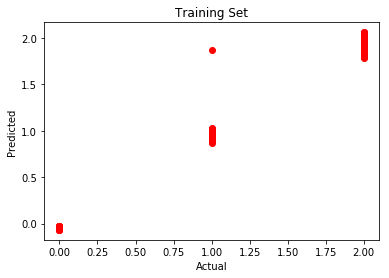

In [2]:
#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

('Validation Set R-Square=', 0.9952208160575283)


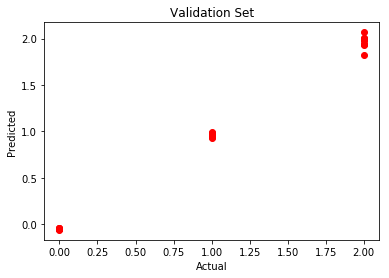

In [3]:
#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)